Q1. a. Polynomial of degree $\frac{(n)(n+1)}{2}$

Ans. Considering $x_1, x_2 \dots x_n$ as variables, the maximum degree can be obtained by multiplying all the diagonal entries. Doing that, we will obtain a term of $1 \times x_1 \times x_2^2 \dots x_n^n$. Since all are variables, the total degree of this polynomial will be $1 + 2 + 3 + 4 + \dots n$, which is equal to $\frac{n(n+1)}{2}$.

Q1. b. If $x_i = x_j$, then det(V) = 0

Ans. If $x_i = x_j$, an entire ith row will be zero.

\begin{gather}
V_{n+1} = 
\begin{bmatrix}
1&x_0&x_0^2 & \dots & x_0^{n}\\
0&x_1-x_0&x_1^2-x_0^2 & \dots & x_1^{n}-x_0^{n}\\
\vdots & \vdots & \vdots & \ddots &\vdots\\
0&x_i-x_0&x_i^2-x_0^2 & \dots & x_i^{n}-x_0^{n}\\
\vdots & \vdots & \vdots & \ddots &\vdots\\
0&x_n-x_0&x_n^2 - x_0^2 & \dots & x_n^{n} - x_0^n\\
\end{bmatrix}
\end{gather}

In the matrix, the (i+1)th row will be zero, therefore the determinant will be zero.

Q1. c. $(x_i - x_j)$ is a factor of det(V)

Ans. When $x_i = x_j$, det(V) is zero. This means that $x_i - x_j$ divides det(V) completely. It is therefore, a factor of det(V).

Q1.d. 
\begin{equation}
det(V) = C\Big(\prod_{1 \leq j<i \leq n}(x_i-x_j) \Big) 
\end{equation}

Ans.
If x_i - x_j is a factor of det(V), if we take all the factors, we can form det(V).

Let us say that det(V) is a polynomial of degree $\frac{n(n+1)}{2}$. 
Now, to not repeat any case, for example, if $x_2 - x_1$ is a factor of det(V), then by this analogy, $x_2-x_1$ is also a factor of det(V). To counter this, we will always take those cases where i>j. Equality is not mentioned because this will make the factor = 0. So,

For i = 1, we have j = 0.
For i = 2, we have j =0,1.
Similarly, for i = n, we have j = $0,1,2,3 \dots (n-1)$

All of these terms need to be multiplied. 
For i = 1, $(x_1 - x_0) is the only term possible. 
For i = 2, $(x_1 - x_0)(x_2 - x_0) is possible. 

Similarly, multiplying all the terms, we obtain a polynomial of degree \frac{n(n+1)}{2}.

Now, the determinant degree as we calculated in (a) is also $\frac{n(n+1)}{2}$, which means that these are the only terms possible. Since the order analysis doesn't take care of a constant, i.e., we have no clue about the constant that has to be multiplied, we leave it at this form:

\begin{equation}
det(V) = C\Big(\prod_{1 \leq j<i \leq n}(x_i-x_j) \Big) 
\end{equation}

Q1.e.C = 1

Ans. To find out the coefficient of $x_1 \times x_2^2 \times x_3^3 \dots x_n^n$, we multiply the diagonal terms, and obtain $x_1 \times x_2^2 \times x_3^3 \dots x_n^n$, therefore, the constant C = 1.

Q2. a. Condition number of Vandermonde Matrices as a function of n.

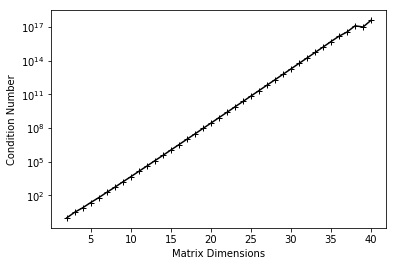

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pylab as pl
Nmax = 41;
N = np.arange(2,Nmax);
c = np.zeros(Nmax-2);
for n in N:
    x = np.linspace(-1,1,n);
    V = np.vander(x,increasing="True");
    c[n-2] = np.linalg.cond(V);
pl.semilogy(N,c,'k-+');
pl.xlabel('Matrix Dimensions')
pl.ylabel('Condition Number')
pl.show()

This is a semi log plot between the condition number and dimensions (NXN) of a matrix. The graph is a straight line, which shows that as the dimensions of the matrix increases, the condition number increases exponentially.

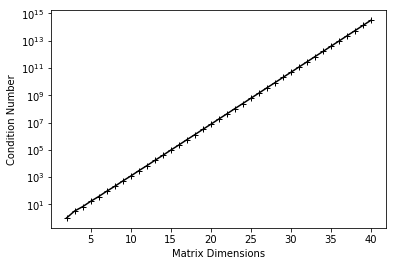

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pylab as pl
Nmax = 41;
pi = 3.142
N = np.arange(2,Nmax);
c = np.zeros(Nmax-2);
for n in N:
    xt = np.linspace(-1,1,n);
    x = sp.sin(pi*xt/2);
    V = np.vander(x,increasing="True");
    c[n-2] = np.linalg.cond(V);
    
pl.semilogy(N,c,'k-+');
pl.xlabel('Matrix Dimensions')
pl.ylabel('Condition Number')
pl.show();

As the dimensions of the matrix increases, the condition number increases. However, the value of condition number is much less for the latter case for the same matrix dimensions when compared t the case where the nodes are equally spaced. The Chebyshev nodes therefore, reduces the error one faces when trying to interpolate a function, by not having equally spaced grids, rather, having them at strategic locations. 

Q2. b. Interpolant for Runge function using linear system

In [73]:
import numpy as np
import scipy as sp
from numpy.linalg import inv
import matplotlib.pylab as pl

def function(x):
    f = 1.0/(1+25*x*x);
    return f;

def VanderU(nnodes):
    #f = 1;
    x = np.linspace(-1,1,nnodes);
    VU = np.vander(x,increasing="True");
    f = function(x)
    VUinv = inv(VU);
    VUfinal = np.matmul(VUinv,f)
    return VUfinal;
    
def VanderC(nnodes):
    f = 1;
    x = np.linspace(-1,1,nnodes);
    y = sp.sin(sp.pi*x/2);
    VC = np.vander(y,increasing="True");
    VCinv = inv(VC);
    VCfinal = np.matmul(VCinv,f)
    return VCfinal;

nnodes = 5;
Unodes = np.linspace(-1,1,nnodes);
Cnodes = sp.sin(pi*Unodes/2);
#yU = function(Unodes);
#yC = function(Cnodes);
polU = np.zeros(sp.size(nnodes));
polC = np.zeros(sp.size(nnodes));

for i in range (1,6):
    nnodes = 5*i;
    polU = VanderU(nnodes);
    polC = VanderC(nnodes);
    
#nnodes    = 201;
# xnodes, fnodes, fplot = Chebyshev(nnodes,xplot);
# xnodes, fnodes, fplot = Uniform(nnodes,xplot);
#fplot        = Uniform(nnodes,xplot);

#error       = f_actual-fplot;
#print(np.amax(np.abs(error)))
#pl.plot(xplot,f_actual,'-');
#pl.plot(xplot,fplot,'r');
#pl.rcParams["figure.figsize"] = [16,4];
print(f_actual);
pl.plot(xplot,f_actual);

ValueError: Scalar operands are not allowed, use '*' instead

Q2. b. Interpolant for Runge function using lagrange polynomials + Chebyshev Nodes

0.45997768664047717
0.3190952547347732
0.05350803943024074
0.04495464768853019
0.008163340373174566


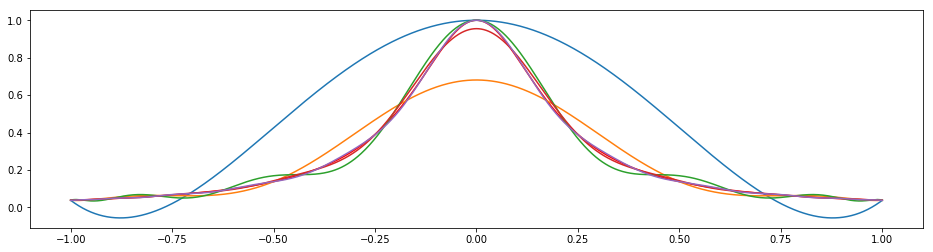

In [58]:

import numpy as np
import scipy as sp
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import binom;

def function(x):
    f = 1.0/(1+25*x*x);
    return f;
    
def Chebyshev(nnodes,xplot):
    # Chebyshev node interpolation
    xnodes    = np.cos(np.arange(0,nnodes)*np.pi/(nnodes-1));
    fnodes     = function(xnodes);
    fplot        = 0;
    for i in range(0,nnodes):
        fplot = fplot + fnodes[i]*Lagrange(xnodes,xplot,i);
        
    #plt.plot(xplot,f_actual);
    return xnodes, fnodes, fplot;
        
nplot       = 1001;
xplot       = np.linspace(-1,1,nplot);
f_actual   = function(xplot);
plt.plot(xplot,f_actual,'r');

for i in range(1,12):
    nnodes    = 5*i;
    if n == 5 || n == 10 || n == 20 || n ==50
    xnodes, fnodes, fplot = Chebyshev(nnodes,xplot);
    plt.plot(xplot,fplot);
    error = f_actual-fplot;
    print(np.amax(np.abs(error)));
plt.show()

0.43835262054180296
0.30028112979256866
7.192113035022598
8.575632648550263
257.21291233463535


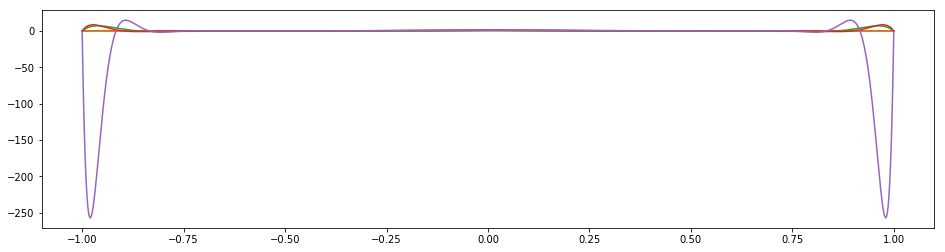

In [63]:
import numpy as np
import scipy as sp
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import binom;

def function(x):
    f = 1.0/(1+25*x*x);
    return f;

def Uniform(nnodes,xplot):
    # Uniform node interpolation
    xnodes = np.linspace(-1,1,nnodes);
    fnodes = function(xnodes);
    fplot  = 0;
    for i in range(0,nnodes):
        fplot = fplot + fnodes[i]*Lagrange(xnodes,xplot,i);
    return xnodes, fnodes, fplot;

nplot       = 1001;
xplot       = np.linspace(-1,1,nplot);
f_actual   = function(xplot);
plt.plot(xplot,f_actual,'r');

for i in range(1,6):
    nnodes    = 5*i;
    xnodes, fnodes, fplot = Uniform(nnodes,xplot);
    plt.plot(xplot,fplot);
    error = f_actual-fplot;
    print(np.amax(np.abs(error)));
plt.show()

Q2. c. Cost of evaluating the interpolant.

Ans. The cost of evaluating an interpolant in matrix form can be divided into two parts:

a. Cost of solving the matrix : $O(N^3)$
b. Cost of solving the interpolant at a particular point : $O(N)$.

The cost of forming a lagrange polynomial is $O(N^2)$ while solving the interpolant at a particular point if we use Lagrange Polynomials is $O(N)$. 


Q2. d. Preference for polynomial approximation.

Ans.
If we need to find the interpolation at m points, the total cost will be of the order $O(n^3 + mn)$ for the case when we solve using Vandermonde Matrices. On the other hand, if we use Lagrange Polynomials, the total cost of evaluating interpolation at m points will be given by $O(n^2 + mn)$.

Clearly, using Lagrange polynomials is a better option.

Q3. For any set of interpolation nodes,

\begin{equation}
\sum_{j=0}^{n}x_jl_j(x) = x^m
\end{equation}

Ans. If p(x) is a polynomial of degree m that interpolates a given set of n grid points, given by $y_j$, we can write as:

$p(x_j) = y_j$

where $y_j$ are the points from the function $x^m$.

Now, for any point $x_i$ in the domain, we can write as

\begin{equation}
l_j(x_i) = \prod^n_{m=0,m \neq j} \frac{x_i - x_m}{x_j - x_m}
\end{equation}

We know that for $ l_j(x) $, when $i \neq j$,  then one product in the term will be zero, thereby zeroing the entire value. 


$l_j(x_i)$ can be written as the Kronecker Delta function $\delta_{ji}$. Therefore, if I have n grid points and I need to have a mth degree polynomial, where $m<n$, then it can be approximated as :

\begin{equation}
p(x_i) = \sum^n_{j = 0}y_jl_j(x_i) = \sum^n_{j = 0}y_j \delta_{ji} = y_i = x_i^m
\end{equation}

In general terms, we can write as :

\begin{equation}
p(x) = x^m 
\end{equation}

Hence, verified.

Q4. 
\begin{equation}
H^\alpha([-1,1]) \subset H^\beta([-1,1])
\end{equation}

Ans. 
Take any function f(x), and if it is $\alpha$-Holder continuous, it must satisfy:

\begin{equation}
\vert f(x) - f(y) \vert \leq C \vert x-y \vert^\alpha
\end{equation}

Also, if g(x) is a function which is $\beta$-Holder continuous, it must satisfy:

\begin{equation}
\vert g(x) - g(y) \vert \leq C \vert x-y \vert^\beta
\end{equation}

For $\vert x - y \vert < 1$, if $\alpha < \beta$ we have

$\vert x - y \vert^\alpha > \vert x - y \vert^\beta $, justifying the below relation:

\begin{equation}
\vert g(x) - g(y) \vert \leq C \vert x-y \vert^\beta \leq C \vert x-y \vert^\alpha
\end{equation}

For all functions $g(x)$, if they are $\beta$-Holder functions, then they are necessarily $\alpha$-Holder function.   

Q5. a. Continuous but not holder for any $\alpha$>0

Ans.\begin{equation}
\delta = 
\left\{\begin{array}{ll}
0 & x = 0 \\
\frac{1}{log(x)} & x \in (0,3/4) 
\end{array} \right.
\end{equation}

The function is continuous because at x close to 0, $\frac{1}{log(x)}$ assumes a value near to 0. FOr Holder continuity, the function must follow this identity:

\begin{equation}
\vert f(x) - f(y) \vert \leq C \vert x-y \vert^\alpha
\end{equation}

Let y = 0, then

\begin{equation}
\vert \frac{1}{log(x)} \vert \leq C\vert x \vert^\alpha
\end{equation}

or 

\begin{equation}
1 \leq C\vert y \vert^\alpha \vert log(x) \vert
\end{equation}

which is not true, because for values of x close to zero, the limit of the function is zero from L'Hospital's rule, which makes the aboe equation fail. So, not a $\alpha$-Holder equation.

Q5. b. Lipschitz but not differentiable.

Ans. Consider the function f(x) = $\vert x \vert$.
This function is lipschitz continuous because for any x and y, this holds:

\begin{equation}
\vert f(x) - f(y) \vert \leq C \vert x-y \vert
\end{equation}

because 

\begin{equation}
\vert \vert x \vert - \vert y \vert \vert \leq C \vert x-y \vert
\end{equation}

However, at x = 0, the function is not differentiable as at x = 0, y = x and y = -x are both satisfied and their slopes are not equal.

Q5. c. Differentiable but its derivative is not continuous.

Ans. Consider the function $f(x) = xsin(1/x).

We have 

\begin{equation}
g(x) = 
\left\{\begin{array}{ll}
xsin(1/x) & x \neq 0 \\
0 & x = 0 
\end{array} \right.
\end{equation}


\begin{equation}
g'(x) = 
\left\{\begin{array}{ll}
sin(1/x) - \frac{1}{x^2}cos(1/x) & x \neq 0 \\
0 & x = 0 
\end{array} \right.
\end{equation}

Limit at x close to 0 doesn't exist but g'(0) = 0 from g(x). This is an example of a lipschitz function with a discontinuity in its derivative.